# Enter Dogs vs Cats Redux Competition on Kaggle

In [1]:
import os, sys

%cd ~/fastai/lesson1

current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir + "/data/redux"

sys.path.insert(1, os.path.join(sys.path[0], '..'))

from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

from utils import *
from utils import plots
from vgg16 import Vgg16

%matplotlib inline


/home/ubuntu/fastai/lesson1


Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


#### To Do
* Create validation set and sample
* move to separate dirs for each set
* finetune and train
* submit competition

### Create Validation Set and Sample

In [2]:
%cd $DATA_HOME_DIR
%mkdir valid
%mkdir results
%mkdir -p sample/train
%mkdir -p sample/test
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p test/unknown

/home/ubuntu/fastai/lesson1/data/redux


In [3]:
%cd $DATA_HOME_DIR/train

/home/ubuntu/fastai/lesson1/data/redux/train


In [4]:
g = glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i], DATA_HOME_DIR + "/valid/" + shuf[i])

In [5]:
from shutil import copyfile

g = glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i], DATA_HOME_DIR + "/sample/train/" + shuf[i])

In [6]:
%cd $DATA_HOME_DIR/valid

/home/ubuntu/fastai/lesson1/data/redux/valid


In [ ]:
g = glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(50): copyfile(shuf[i], DATA_HOME_DIR + "/sample/valid/" + shuf[i])

### Rearrange image files into their respective directories

In [8]:
%cd $DATA_HOME_DIR/sample/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/fastai/lesson1/data/redux/sample/train


In [9]:
%cd $DATA_HOME_DIR/sample/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/fastai/lesson1/data/redux/sample/valid


In [10]:
%cd $DATA_HOME_DIR/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/fastai/lesson1/data/redux/valid


In [11]:
%cd $DATA_HOME_DIR/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/fastai/lesson1/data/redux/train


In [12]:
%cd $DATA_HOME_DIR/test
%mv *.jpg unknown/

/home/ubuntu/fastai/lesson1/data/redux/test


### Finetuning and Training

In [52]:
%cd $DATA_HOME_DIR

path = DATA_HOME_DIR + "/"
test_path = DATA_HOME_DIR + "/test/"
results_path = DATA_HOME_DIR + "/results/"
train_path = path + "/train/"
valid_path = path + "/valid/"


/home/ubuntu/fastai/lesson1/data/redux


In [53]:
vgg = Vgg16()

In [54]:
batch_size = 64
no_of_epochs = 3

batches = vgg.get_batches(train_path, batch_size = batch_size)
val_batches = vgg.get_batches(valid_path, batch_size = batch_size * 2)
vgg.finetune(batches)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [55]:
vgg.model.optimizer.lr = 0.01

latest_weights_filename = None
for epoch in range(no_of_epochs):
    print("Running epoch: %d" % epoch)
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = "ft%d.h5" % epoch
    vgg.model.save_weights(results_path + latest_weights_filename)
    
print("Completed %s fit operations" % no_of_epochs)

Running epoch: 0
Epoch 1/1
23000/23000 [==============================] - 581s - loss: 0.3221 - acc: 0.9715 - val_loss: 0.3315 - val_acc: 0.9735
Running epoch: 1
Epoch 1/1
23000/23000 [==============================] - 581s - loss: 0.3175 - acc: 0.9762 - val_loss: 0.2841 - val_acc: 0.9795
Running epoch: 2
Epoch 1/1
23000/23000 [==============================] - 580s - loss: 0.3327 - acc: 0.9767 - val_loss: 0.2234 - val_acc: 0.9845
Completed 3 fit operations


In [56]:
batches, preds = vgg.test(test_path, batch_size = batch_size * 2)

Found 12500 images belonging to 1 classes.


In [57]:
print(preds[:5])

[[  1.0000e+00   0.0000e+00]
 [  1.0000e+00   8.2794e-29]
 [  1.0000e+00   0.0000e+00]
 [  1.0000e+00   0.0000e+00]
 [  0.0000e+00   1.0000e+00]]


In [45]:
print(batches.filenames[:5])

['unknown/9292.jpg', 'unknown/12026.jpg', 'unknown/9688.jpg', 'unknown/4392.jpg', 'unknown/779.jpg']


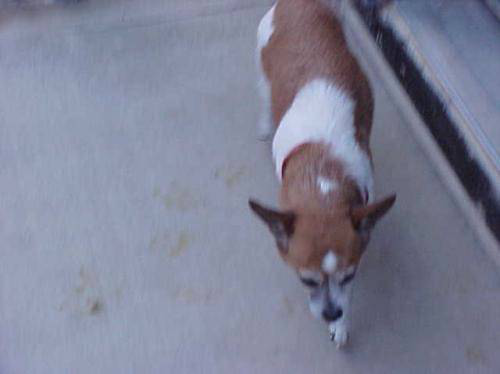

In [41]:
from PIL import Image
Image.open(test_path + batches.filenames[1])

In [32]:
filenames = val_batches.filenames
expected_labels = val_batches.classes

our_predictions = preds[:,0]
our_labels = np.round(1 - our_predictions)

In [33]:
from keras.preprocessing import image

def plots_idx(idx, titles = None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles = titles)

n_view = 4

In [37]:
correct = np.where(our_labels==expected_labels)[0]
print("Found %d correct labels" % len(correct))
idx = np.random.permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 0 correct labels


/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


NameError: global name 'plots' is not defined

In [58]:
filenames = batches.filenames

isdog = preds[:,1]
isdog = isdog.clip(min=0.05, max=0.95)

ids = np.array([int(f[8:f.find('.')]) for f in filenames])

subm = np.stack([ids,isdog], axis=1)
subm[:5]

array([[  9.2920e+03,   5.0000e-02],
       [  1.2026e+04,   5.0000e-02],
       [  9.6880e+03,   5.0000e-02],
       [  4.3920e+03,   5.0000e-02],
       [  7.7900e+02,   9.5000e-01]])

In [59]:
%cd $DATA_HOME_DIR
submission_file_name = 'submission1.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

/home/ubuntu/fastai/lesson1/data/redux


In [60]:
from IPython.display import FileLink
%cd $LESSON_HOME_DIR
FileLink('data/redux/'+submission_file_name)

/home/ubuntu/fastai/lesson1


/home/ubuntu/fastai/lesson1/data/redux/submission1.csv